In [2]:
import numpy as np
import matplotlib.pyplot as plt

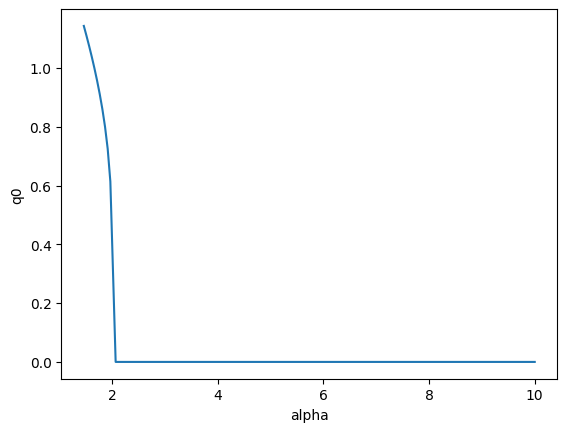

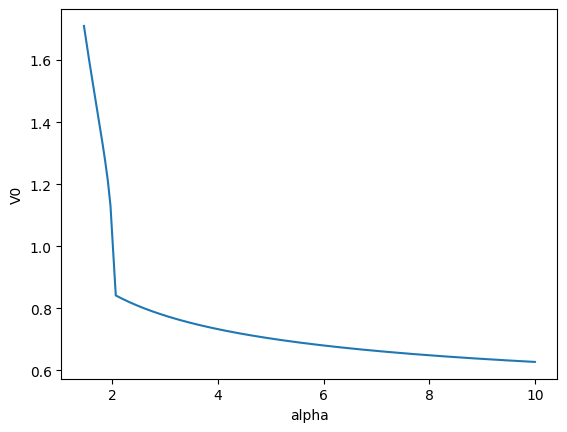

In [7]:
# --- fill these two with your m=0 SE updates ---
def Fq(q, V, alpha, lam):  # q_new
    C = V*(2-q)*(1-V*(2-q))
    return alpha*q*C**2/2/(lam + alpha/2*(q*(C+1)**2-C))**2

def FV(q, V, alpha, lam):  # V_new
    C = V*(2-q)*(1-V*(2-q))
    return 1/(lam + alpha/2*(q*(C+1)**2-C))

def solve_qV(alpha, lam=0.0, q=1e-6, V=1.0, iters=2000, tol=1e-10, damp=0.3):
    for _ in range(iters):
        qn, Vn = Fq(q, V, alpha, lam), FV(q, V, alpha, lam)
        q2, V2 = (1-damp)*q + damp*qn, (1-damp)*V + damp*Vn
        if max(abs(q2-q), abs(V2-V)) < tol:
            return float(q2), float(V2), True
        q, V = q2, V2
    return float(q), float(V), False

def trace(alpha_grid, lam=0.0, q0=0.8, V0=0.1, **kw):
    q_list, V_list, ok = [], [], []
    q, V = q0, V0
    for a in alpha_grid:
        q, V, conv = solve_qV(a, lam=lam, q=q, V=V, **kw)  # continuation
        q_list.append(q); V_list.append(V); ok.append(conv)
    return np.array(q_list), np.array(V_list), np.array(ok, dtype=bool)

# --- run ---
lam = 0
alphas = np.linspace(0.01, 10.0, 200)

q0, V0, ok = trace(alphas, lam, iters=3000, tol=1e-10, damp=0.2)

plt.plot(alphas[ok], q0[ok]); plt.xlabel("alpha"); plt.ylabel("q0"); plt.show()
plt.plot(alphas[ok], V0[ok]); plt.xlabel("alpha"); plt.ylabel("V0"); plt.show()


